# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import scipy.stats as st
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1. Is the distribution of body temperatures normal?

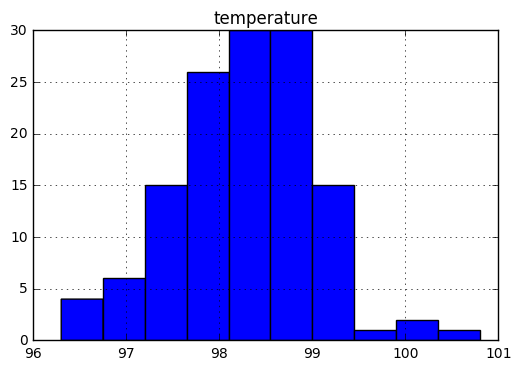

In [3]:
pd.DataFrame.hist(df, column='temperature');

The sampling distribution seems slightly skewed to the right, but takes the form of a normal distribution.

# 2. Is the sample size large? Are the observations independent?

In [4]:
print('We have', len(df), 'samples across', len(list(df.columns)), 'features.')
# confirmed here: https://ww2.amstat.org/publications/jse/datasets/normtemp.txt

We have 130 samples across 3 features.


From the article surrounding this data set (http://ww2.amstat.org/publications/jse/v4n2/datasets.shoemaker.html) we see that "The {original} authors display a histogram of 148 subjects' normal temperatures taken at several different times during two consecutive days, resulting in 700 total readings. The relative frequency histogram is also broken down by gender (122 males and 26 females). I derived the dataset presented here by working backwards from this histogram. I tried as closely as possible to recreate the original data, but with a reduction in sample size to 130 total readings. Relatively more of the female subjects' readings have been represented, so that the number of male and female readings would be equal." These observations are independent.

# Is the true population mean really 98.6 degrees F?  
<li> Would you use a one-sample or two-sample test? Why? </li>
I would use a one-sample test because we are trying to compare a sample group mean to the accepted population mean, and determining whether the sample group mean is unlikely to be found if the true population mean is 98.6 degrees F.  
<li> In this situation, is it appropriate to use the t or z statistic? </li>
I would use the t statistic since the population's standard deviation is unknown.

In [5]:
mean_temp = df['temperature'].mean()
print('Mean temperature of the sample is: {:.2f}'.format(mean_temp))

Mean temperature of the sample is: 98.25


We need to compare the sample mean to the population mean of 98.6.  
H<sub>0</sub>: $M$ = 98.6  
H<sub>1</sub>: $M$ < 98.6

In [6]:
one_sample = st.ttest_1samp(df['temperature'], popmean=98.6)
print('The t-statistic is %.3f and the p-value is %.10f.' % one_sample)

The t-statistic is -5.455 and the p-value is 0.0000002411.


We can see that it is unlikely we would get a sample mean of 98.25 if the true mean were 98.6. In this case, we can reject the null that the mean is 98.6.  
We can further check the work by constructing a 95% confidence interval:

In [10]:
lower, upper = st.t.interval(0.95, len(df['temperature'])-1, 
                             loc=np.mean(df['temperature']), 
                             scale=st.sem(df['temperature']))

print('The 95% confidence interval is ({:.2f}, {:.2f}).'.format(lower,upper))

The 95% confidence interval is (98.12, 98.38).


Both of these examples above show us that it is very unlikely that the true population mean is 98.6 degrees F.

# 4. At what temperature should we consider someone's temperature to be "abnormal"?

Considering the impacts of making a Type I error versus a Type II error, it seems that alpha = 0.05 is an acceptable balance between the two. We don't want to create such a high threshold for a confidence interval such that we reject the null when it is true and risk getting other people sick while we also do not want to make the mistake that people are sick when they are healthy. The risk of getting others sick is slightly worse. Given the confidence interval above of (98.12, 98.38), these temperatures could be used as a threshold for an "abnormal" temperature, but, depending on outside circumstances, these temperatures may not indicate sickness - just abnormality.

# 5. Is there a significant difference between males and females in normal temperature?

In [13]:
male_df = df[df['gender'] == 'M']
female_df = df[df['gender'] == 'F']

print('There are {} males in the sample and their mean temperature is {:.2f}'.format(len(male_df), 
                                                                                     male_df['temperature'].mean()))
print('There are {} females in the sample and their mean temperature is {:.2f}'.format(len(female_df), 
                                                                                       female_df['temperature'].mean()))

There are 65 males in the sample and their mean temperature is 98.10
There are 65 females in the sample and their mean temperature is 98.39


These two means seem to be different, so we should compare the male sample mean to the female sample mean.  
H<sub>0</sub>: $M$<sub>m</sub> = $M$<sub>f</sub>  
H<sub>1</sub>: $M$<sub>m</sub> ≠ $M$<sub>f</sub>

In [16]:
two_sample = st.ttest_ind(male_df['temperature'], female_df['temperature'])
print('The t-statistic is %.3f and the p-value is %.3f.' % two_sample)

The t-statistic is -2.285 and the p-value is 0.024.


Due to the nature of the question, a two-sample t-test is more suitable than a one-sample t-test as used above. Given the low p-value it is unlikely that we found this sample due to random chance and therefore unlikely that the two mean temperatures are equal. This is a statistical significance, but not a practical significance because of the nature of human temperatures. The difference between the two mean temperatures is fairly neglibigle and so, while there is statistical significance, there does not seem to be a practical need to conclude and publish different mean temperatures for different genders.